### Name: Ambreen Abdul Raheem
### Teacher: Sir Sajjid Majeed
### Subject: Machine Learning
### Program: Data Science with Artificial Intelligence
### Github:https://github.com/ambreenraheem?tab=overview&from=2024-09-01&to=2024-09-30
### Email: ambreen.a.raheem@outlook.com
### LinkedIn: https://www.linkedin.com/in/ambreen-abdul-raheem-122509300/

# 11-1-2025 and 12-1-2025 and 18-1-2025
## (K-Nearest Neighbors) KNN
#### titanic dataset

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# filling NaN values

In [ ]:
df['Age']=df['Age'].fillna(df["Age"].mean())

In [7]:
df['Age'].isnull().sum()

np.int64(0)

In [8]:
df.Age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [9]:
df.Age.mean()

np.float64(29.69911764705882)

In [10]:
df.Age.median()

np.float64(29.69911764705882)

In [11]:
df.Age.std()

np.float64(13.002015226002882)

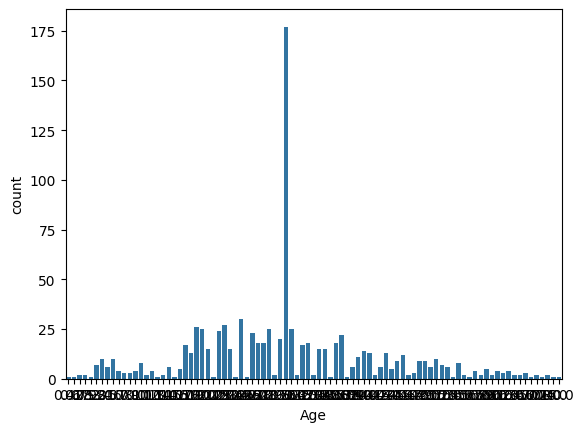

In [12]:
%matplotlib inline
sns.countplot(x=df['Age'])
plt.show()

In [13]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
df['Embarked'].isnull().sum()

np.int64(0)

In [16]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode())

In [17]:
df['Cabin'].isnull().sum()

np.int64(685)

In [18]:
df['Cabin'].value_counts()

Cabin
B96 B98        5
G6             5
C23 C25 C27    4
F33            3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [19]:
df['Cabin'].nunique()

147

In [20]:
df['Cabin'].unique()

array(['B96 B98', 'C85', 'G6', 'C123', nan, 'E46', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [21]:
df['Embarked'].nunique()

3

In [22]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

# Percentage of Death VS Survived

In [23]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Doing comperising

In [24]:
no_of_passengers= df['Survived'].value_counts()
no_of_deaths=no_of_passengers[0]
no_of_survived=no_of_passengers[1]
print("Number of Deaths",no_of_deaths)
print("Number of Survived",no_of_survived)

Number of Deaths 549
Number of Survived 342


In [25]:
no_of_passengers

Survived
0    549
1    342
Name: count, dtype: int64

# Now taking Percentage

In [26]:
percentage_of_deaths=(no_of_deaths/(no_of_deaths+no_of_survived))*100
percentage_of_deaths

np.float64(61.61616161616161)

In [27]:
percentage_of_survived=(no_of_survived/(no_of_deaths+no_of_survived))*100
print("percentage of deaths is:",percentage_of_deaths)
print("Percentage of Survived is:",percentage_of_survived)

percentage of deaths is: 61.61616161616161
Percentage of Survived is: 38.38383838383838


# Ploting

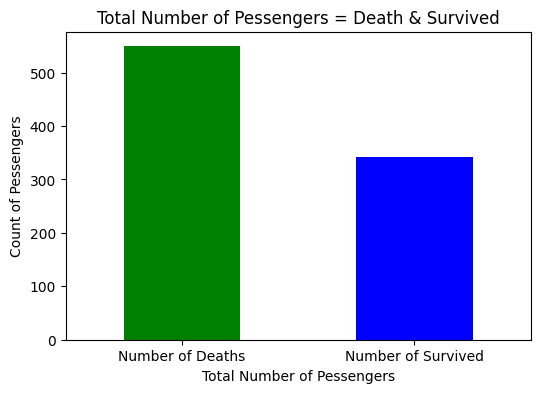

In [28]:
objects=('Number of Deaths','Number of Survived')
bars= np.arange(len(objects))
no_of_passengers.plot(kind='bar',figsize=(6,4),color=['g','b'])
plt.xticks(bars,objects,rotation='horizontal')
plt.title("Total Number of Pessengers = Death & Survived")
plt.xlabel("Total Number of Pessengers")
plt.ylabel("Count of Pessengers")
plt.show()

In [29]:
male_female=df.groupby(["Sex"]).size()
male_female

Sex
female    314
male      577
dtype: int64

In [30]:
survived_male_female=df.groupby(["Sex","Survived"]).size()
survived_male_female

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

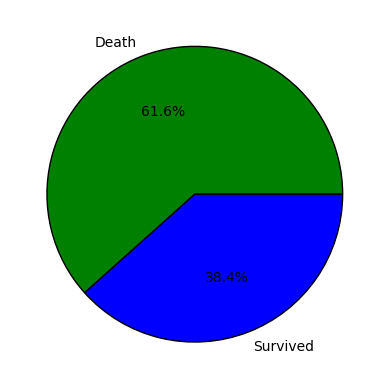

In [31]:
# be careful before labeling because survived_male_female variable and then label it according the numbers
import matplotlib.pyplot as plt

colors = ['g', 'b']   
labels = ['Death', 'Survived']     

# Plotting the pie chart
plt.pie(no_of_passengers,colors=colors,labels=labels,autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.show()

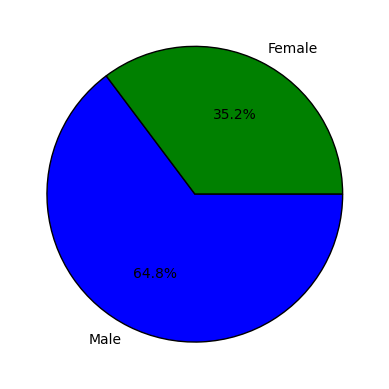

In [32]:

colors = ['g', 'b']   
labels = ['Female', 'Male']     

# Plotting the pie chart
plt.pie(male_female,colors=colors,labels=labels,autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.show()

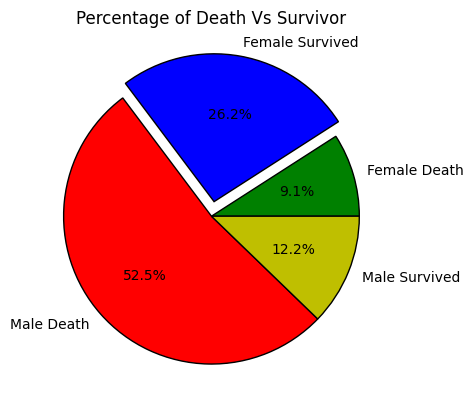

In [33]:
colors = ['g', 'b','r','y']   
labels = ['Female Death','Female Survived','Male Death','Male Survived']     

plt.pie(survived_male_female,colors=colors,labels=labels,autopct='%.1f%%',wedgeprops={'edgecolor':'black'},explode=[0,0.1,0,0])
plt.title("Percentage of Death Vs Survivor")
plt.show()

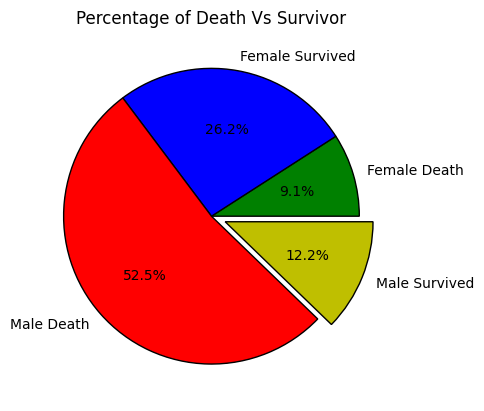

In [34]:
colors = ['g', 'b','r','y']   
labels = ['Female Death','Female Survived','Male Death','Male Survived']     

plt.pie(survived_male_female,colors=colors,labels=labels,autopct='%.1f%%',wedgeprops={'edgecolor':'black'},explode=[0,0,0,0.1])
plt.title("Percentage of Death Vs Survivor")
plt.show()

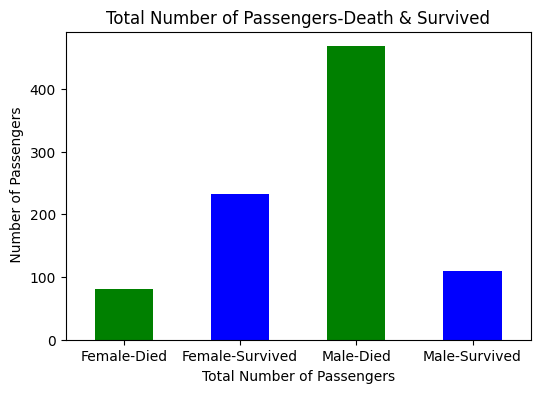

In [35]:
objects= ('Female-Died','Female-Survived','Male-Died','Male-Survived')
bars=np.arange(len(objects))
survived_male_female.plot(kind='bar',figsize=(6,4),color=['g','b'])
plt.title("Total Number of Passengers-Death & Survived")
plt.xticks(bars,objects,rotation='horizontal')
plt.xlabel('Total Number of Passengers')
plt.ylabel(' Number of Passengers')
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

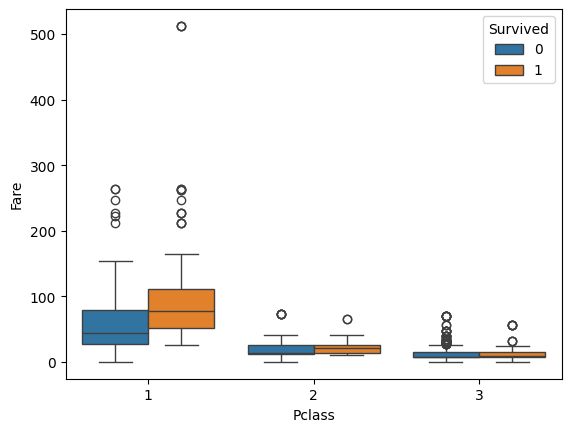

In [36]:
# seaborn
sns.boxplot(x='Pclass',y='Fare',hue='Survived',data=df)

In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# spliting

In [38]:
# we need o drop some unneccessary columns from x becuase we don't them for further analysis
X=df.drop(columns=['PassengerId', 'Survived','Name','Fare','Ticket'])

In [39]:
X

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,22.000000,1,0,B96 B98,S
1,1,female,38.000000,1,0,C85,C
2,3,female,26.000000,0,0,G6,S
3,1,female,35.000000,1,0,C123,S
4,3,male,35.000000,0,0,NaN,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,NaN,S
887,1,female,19.000000,0,0,B42,S
888,3,female,29.699118,1,2,NaN,S
889,1,male,26.000000,0,0,C148,C


In [40]:
y=df['Survived']

In [41]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Encoding(ordinal encoding, label encoding, onehot encoding)

In [42]:
# Get Dummies from Pandas Library and work on dummies in one time
X=pd.get_dummies(X,columns=['Sex'],drop_first=True,dtype=int)# get_dummies will remove given column and create its dummy column in integer
X 

,Pclass,Age,SibSp,Parch,Cabin,Embarked,Sex_male
0,3,22.000000,1,0,B96 B98,S,1
1,1,38.000000,1,0,C85,C,0
2,3,26.000000,0,0,G6,S,0
3,1,35.000000,1,0,C123,S,0
4,3,35.000000,0,0,NaN,S,1
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,NaN,S,1
887,1,19.000000,0,0,B42,S,0
888,3,29.699118,1,2,NaN,S,0
889,1,26.000000,0,0,C148,C,1


In [43]:
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder 
One_Hot_Encoder = OneHotEncoder() 
One_Hot_Encoder

OneHotEncoder()

In [44]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop="first",sparse_output=False,dtype=np.int32)
ohe

OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse_output=False)

In [45]:
X=ohe.fit_transform(X[['Embarked']])
X

array([[0, 1],
       [0, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 0],
       [1, 0]], shape=(891, 2), dtype=int32)

# Train test and split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [47]:
X # This X is only showing value of dummy column Sex

array([[0, 1],
       [0, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 0],
       [1, 0]], shape=(891, 2), dtype=int32)

In [48]:
X_train

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], shape=(712, 2), dtype=int32)

In [49]:
X_test

array([[0, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 0],
       [0,

In [50]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [51]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
y_pred=knn.predict(X_test)  #always put X_test for prediction because it is dependent
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [54]:
pd.DataFrame({"Ytest":y_test,"Ypred":y_pred})

,Ytest,Ypred
495,0,0
648,0,0
278,0,1
31,1,0
255,1,0
...,...,...
780,1,0
837,0,0
215,1,0
833,0,0


In [56]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.5754189944134078

In [57]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score,confusion_matrix,classification_report
print("Accuracy Score",accuracy_score(y_test,y_pred))
print("Recall Score",recall_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred,))
print("Classification Report:",classification_report(y_test,y_pred)) 

Accuracy Score 0.5754189944134078
Recall Score 0.043478260869565216
Precision Score: 0.23076923076923078
F1 Score: 0.07317073170731707
Confusion Matrix: [[100  10]
 [ 66   3]]
Classification Report:               precision    recall  f1-score   support

           0       0.60      0.91      0.72       110
           1       0.23      0.04      0.07        69

    accuracy                           0.58       179
   macro avg       0.42      0.48      0.40       179
weighted avg       0.46      0.58      0.47       179

